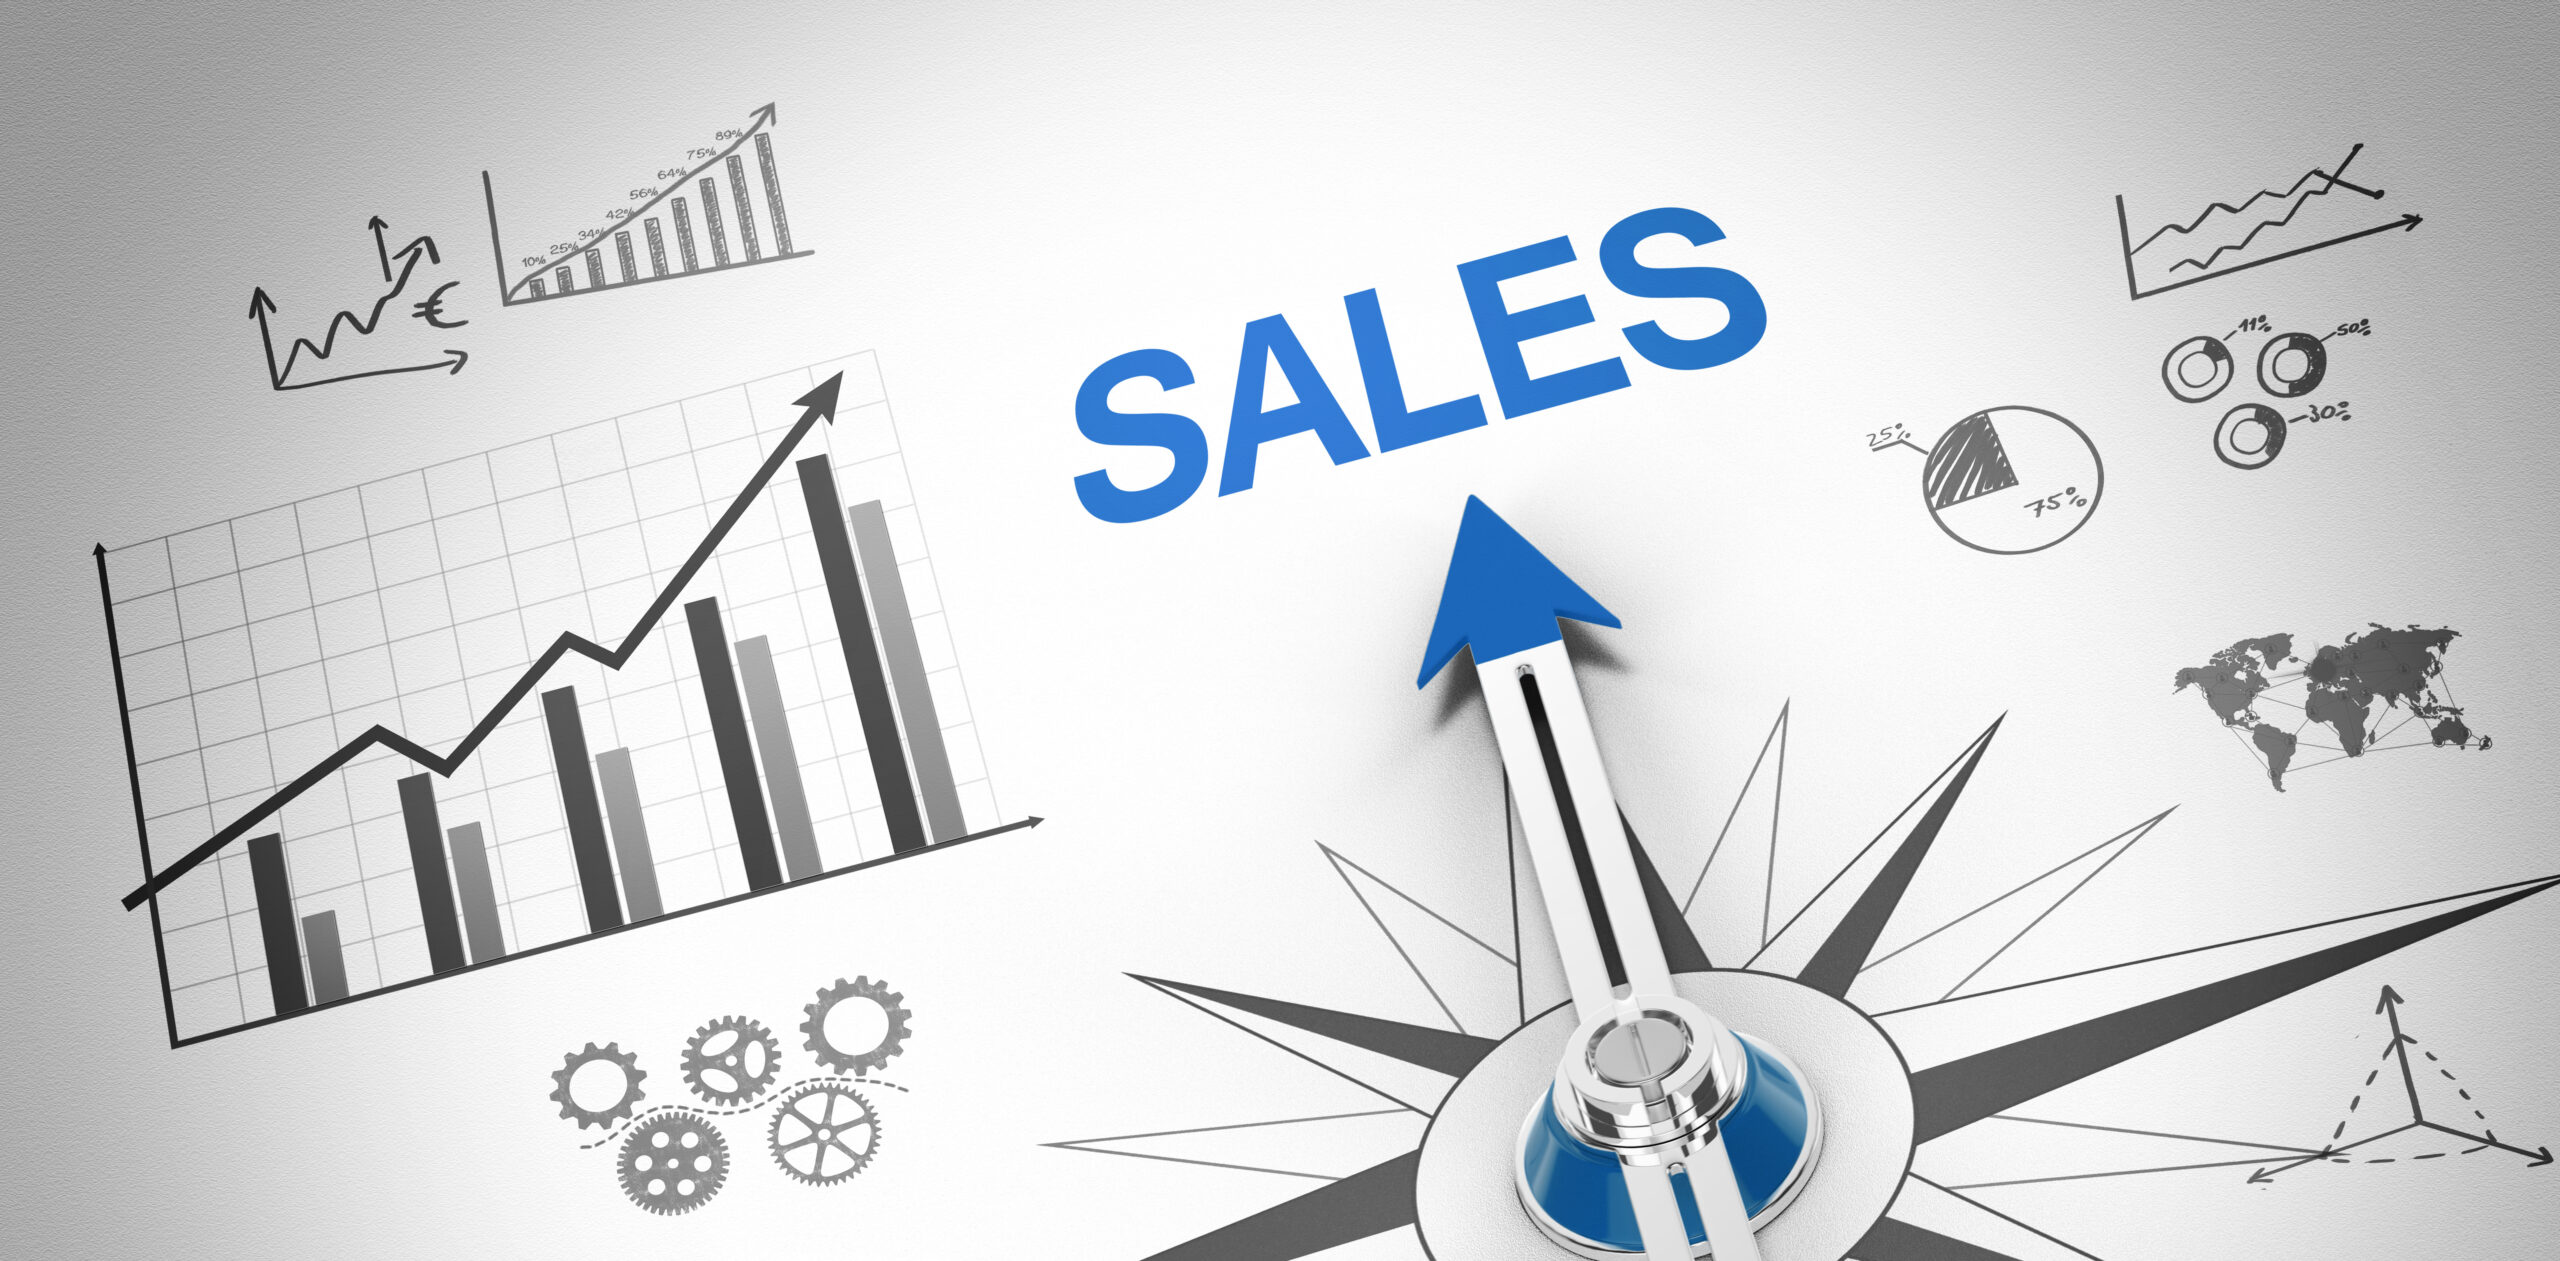

## **Importing Libraries**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### **Read The Dataset**

In [7]:
df=pd.read_csv('/content/drive/MyDrive/INTERNSHIPS/CODSOFT/SALES PREDICTION/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# **DATA PREPROCESSING**

*   List item

*   List item
*   List item


*   List item



In [8]:
#view the shape of dataset
df.shape

(200, 4)

In [9]:
#To print last 5 rows using head function
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
#To print last 5 rows using head function
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [11]:
#view the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
#check the descriptive statistics of numeric variables
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
#checking duplicate values
df.drop_duplicates()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [14]:
#checking the null values
df.isna().any()

,0
TV,False
Radio,False
Newspaper,False
Sales,False


# **DATA VISUALIZATION**

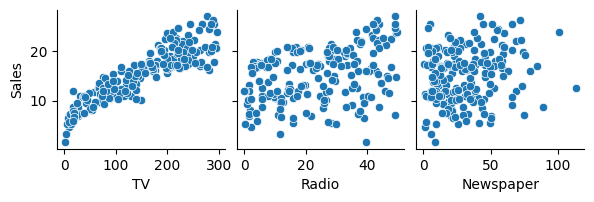

In [15]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=2,kind='scatter')
plt.show()

In [16]:
cor_mtx=df.corr()['Sales']
cor_mtx

,Sales
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


<Axes: >

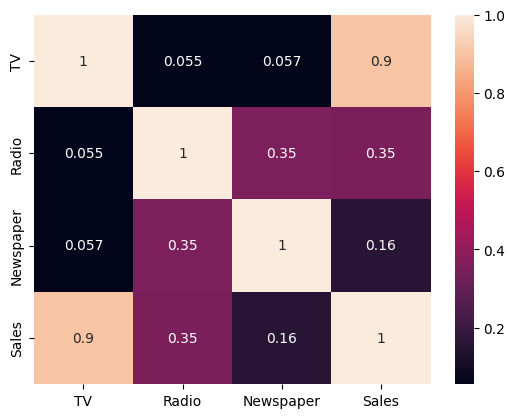

In [17]:
sns.heatmap(df.corr(),annot=True)

From pairplot and the heatmap, the variable TV seems to be most correlated with Sales.

## **Splitting Independent and Dependent Features**

In [18]:
#sepreating input and output variables
x=df.drop('Sales',axis=1)
y=df['Sales']

In [19]:
#predictors
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
#target
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


## **TRAIN TEST SPLITTING**

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


In [22]:
x_train.shape,y_train.shape

((160, 3), (160,))

In [23]:
x_test.shape,y_test.shape

((40, 3), (40,))

# **MODEL CREATION**

### **LINEAR REGRESSION**

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred=regressor.predict(x_test)

In [26]:
y_pred

array([10.70988945,  8.68629773,  9.5778695 , 24.86207988, 14.65584473,
        8.3214275 , 10.43048002, 18.4453765 ,  9.73394291, 17.9290798 ,
       23.369886  , 10.67916356, 13.44032325, 17.17416235, 11.77380187,
       13.37072678, 21.26009906,  9.19666875, 14.13201846, 18.9260716 ,
       24.75507991, 12.48481182, 16.57130583, 13.77344772,  7.79299106,
       15.19648316, 14.71607944, 20.73862119, 17.01041859,  8.83474391,
       12.09424377, 20.74886454, 21.26147987, 21.90420095,  7.08087067,
        7.04431681,  9.15949871, 15.47796148, 13.28282334,  7.23769883])

In [27]:
y_train_pred=regressor.predict(x_train)

In [28]:
y_train_pred

array([10.82854696,  9.1999467 , 15.66755686, 18.28441044, 18.76563654,
       13.5578255 ,  5.46554711, 10.24015212, 15.35798265, 10.90303735,
       12.15078076, 20.43450999, 20.66736217, 16.9634418 ,  9.97774034,
        9.45843981, 23.50058204, 15.94383157, 18.01948292,  8.15357406,
       19.18158045, 15.75000711, 17.00831939, 15.27868163, 18.26380058,
       19.98829408, 22.03107586, 17.62807341, 11.22069262, 11.87977832,
       19.58867934, 12.4962567 , 22.47889831, 24.37804925, 11.45121116,
       15.81772994, 21.46383289, 19.23698119, 19.44385752, 18.85357902,
       18.16835447, 10.56704957,  9.89798803,  7.18796945,  5.43112588,
       19.25163068, 10.57219825, 19.34095833, 10.46427938, 15.28929431,
       16.72372112,  8.8833268 , 16.75837349, 12.24518887, 10.34790049,
       19.79976041, 24.94405796,  9.35259015, 22.05834552, 15.91386693,
        9.35785287, 10.00946274, 15.72270805, 21.09767063, 12.06153332,
       17.6102679 , 16.87762037, 16.48249632, 16.38605079, 17.86

In [29]:
y_test.head()

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7


In [30]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

4.522552562041291

In [31]:
training_score=regressor.score(x_train,y_train)
training_score

0.9132130769530317

In [32]:
testing_score=regressor.score(x_test,y_test)
testing_score

0.8645053923967724

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8645053923967724

# **PREDICTION**

In [34]:
y_result=regressor.predict([[230.1,40.8,70.2]])
print(y_result)

[21.42873768]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
